Testes com os dados do covid no ES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

df = pd.read_csv('https://bi.static.es.gov.br/covid19/MICRODADOS.csv', sep = ';', encoding = 'iso8859_15')

In [2]:
df.columns

Index(['DataNotificacao', 'DataCadastro', 'DataDiagnostico',
       'DataColeta_RT_PCR', 'DataColetaTesteRapido', 'DataEncerramento',
       'DataObito', 'Classificacao', 'Evolucao', 'CriterioConfirmacao',
       'StatusNotificacao', 'Municipio', 'Bairro', 'FaixaEtaria',
       'IdadeNaDataNotificacao', 'Sexo', 'RacaCor', 'Escolaridade', 'Febre',
       'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia',
       'Cefaleia', 'ComorbidadePulmao', 'ComorbidadeCardio',
       'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo',
       'ComorbidadeObesidade', 'FicouInternado', 'ViagemBrasil',
       'ViagemInternacional', 'ProfissionalSaude', 'PossuiDeficiencia',
       'MoradorDeRua'],
      dtype='object')

In [3]:
data_obitos = df['DataObito'].sort_values().dropna().to_numpy().astype(np.datetime64)
data_obitos = data_obitos[len(data_obitos)%7:len(data_obitos)]
dias = df['DataObito'].sort_values().dropna().drop_duplicates().to_numpy().astype(np.datetime64)
dias = dias[len(dias)%7:len(dias)]

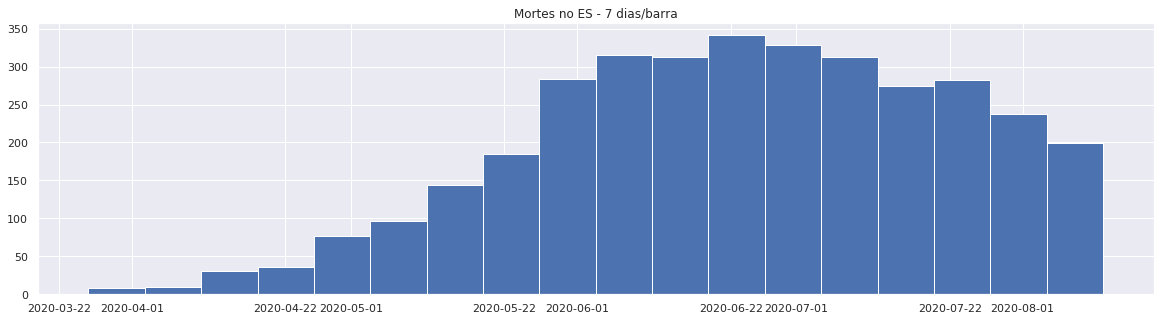

In [4]:
plt.figure(figsize = (20,5))
plt.hist(data_obitos, len(dias)//7)
plt.title('Mortes no ES - 7 dias/barra')
plt.show()

In [5]:
cidades = df['Municipio'].sort_values().drop_duplicates().to_numpy()

In [6]:
gv = ['VITORIA', 'VILA VELHA', 'CARIACICA', 'SERRA', 'VIANA']
df2 = df[df['Municipio'].isin(gv)]

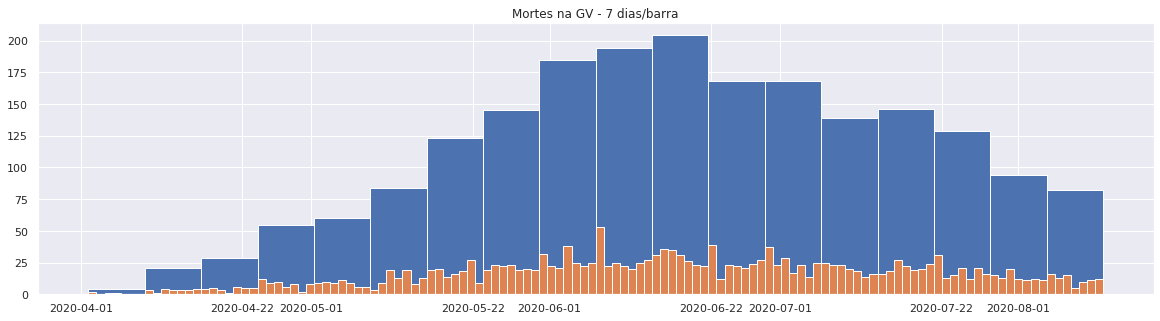

In [7]:
data_obitos2 = df2['DataObito'].sort_values().dropna().to_numpy().astype(np.datetime64)
data_obitos2 = data_obitos2[len(data_obitos2)%7:len(data_obitos2)]
dias2 = df2['DataObito'].sort_values().dropna().drop_duplicates().to_numpy().astype(np.datetime64)
dias2 = dias2[len(dias2)%7:len(dias2)]

plt.figure(figsize = (20,5))
plt.hist(data_obitos2, len(dias2)//7)
plt.hist(data_obitos2, len(dias2))
plt.title('Mortes na GV - 7 dias/barra')
plt.show()

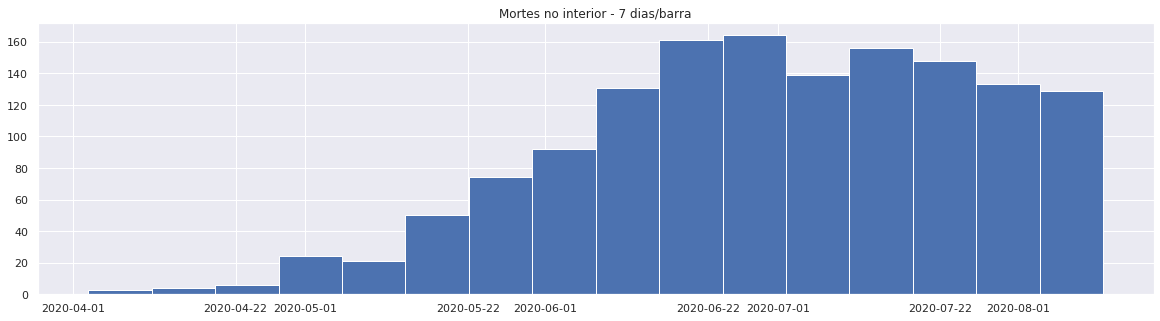

In [8]:
df3 = df[~df['Municipio'].isin(gv)]

data_obitos3 = df3['DataObito'].sort_values().dropna().to_numpy().astype(np.datetime64)
data_obitos3 = data_obitos3[len(data_obitos3)%7:len(data_obitos3)]
dias3 = df3['DataObito'].sort_values().dropna().drop_duplicates().to_numpy().astype(np.datetime64)
dias3 = dias3[len(dias3)%7:len(dias3)]

plt.figure(figsize = (20,5))
plt.hist(data_obitos3, len(dias3)//7)
plt.title('Mortes no interior - 7 dias/barra')
plt.show()

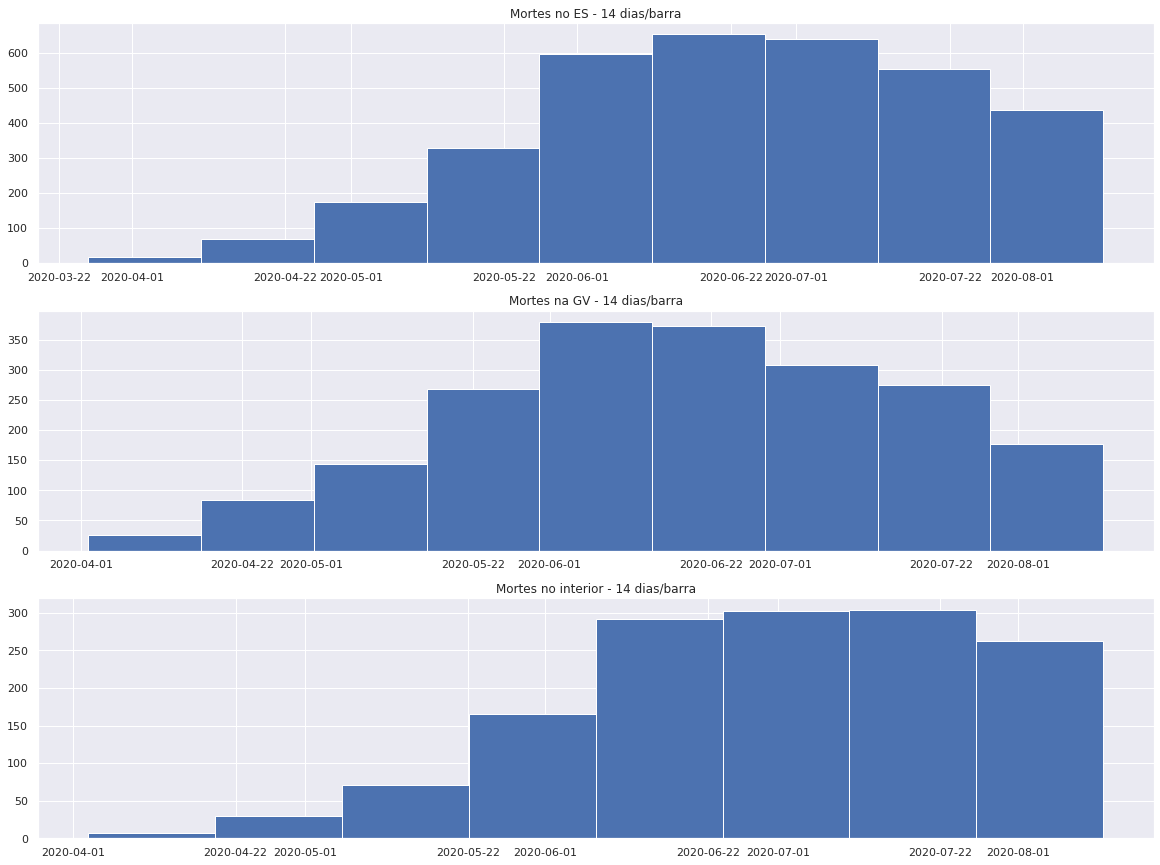

In [9]:
tam=14

plt.figure(figsize = (20,15))

plt.subplot(3,1,1)
plt.hist(data_obitos, len(dias)//tam)
plt.title('Mortes no ES - '+str(tam)+' dias/barra')

plt.subplot(3,1,2)
plt.hist(data_obitos2, len(dias2)//tam)
plt.title('Mortes na GV - '+str(tam)+' dias/barra')

plt.subplot(3,1,3)
plt.hist(data_obitos3, len(dias3)//tam)
plt.title('Mortes no interior - '+str(tam)+' dias/barra')

plt.show()

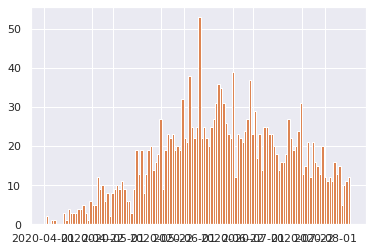

In [10]:
data2_pontos = plt.hist(data_obitos2, len(dias2))
data2_pontos2 = plt.hist(data_obitos2, len(dias2))

In [11]:
data2_pontos[0]

array([ 2.,  0.,  1.,  1.,  0.,  0.,  0.,  3.,  1.,  4.,  3.,  3.,  3.,
        4.,  4.,  5.,  3.,  1.,  6.,  5.,  5., 12.,  9., 10.,  6.,  8.,
        2.,  8.,  9., 10.,  9., 11.,  9.,  6.,  6.,  3.,  9., 19., 13.,
       19.,  8., 13., 19., 20., 14., 16., 18., 27.,  9., 19., 23., 22.,
       23., 19., 20., 19., 32., 22., 21., 38., 25., 22., 25., 53., 22.,
       25., 22., 20., 25., 27., 31., 36., 35., 31., 26., 23., 22., 39.,
       12., 23., 22., 21., 24., 27., 37., 23., 29., 17., 23., 14., 25.,
       25., 23., 23., 20., 18., 14., 16., 16., 18., 27., 22., 19., 20.,
       24., 31., 13., 15., 21., 12., 21., 16., 15., 13., 20., 12., 11.,
       12., 11., 16., 13., 15.,  5., 10., 11., 12.])

In [12]:
# GUARDE BEM ESTA FUNÇÃO

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

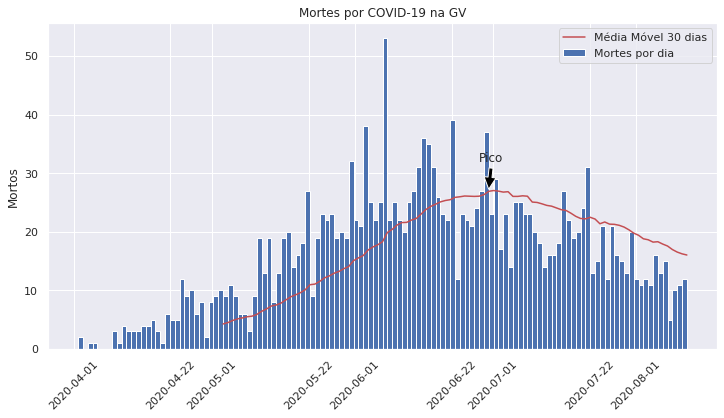

In [13]:
dianal = 30
mob_aver = running_mean(data2_pontos[0], dianal)

xmax = dias2.shape[0]-running_mean(data2_pontos[0], dianal).shape[0]+np.argmax(running_mean(data2_pontos[0], dianal))-3

plt.figure(figsize = (12,6))
plt.hist(data_obitos2, len(dias2))
#plt.plot(np.delete(data2_pontos2[1],np.arange(7)), running_mean(data2_pontos[0], 7), color = 'r')
#plt.plot(np.delete(data2_pontos2[1],np.arange(14)), running_mean(data2_pontos[0], 14), color = 'r')
plt.plot(np.delete(data2_pontos2[1],np.arange(dianal)), mob_aver, color = 'r')
plt.title('Mortes por COVID-19 na GV')
# para o annotate: coordenada de xy devem estar de acordo com os eixos plotados (int, float, str)
plt.annotate('Pico', xy = (str(dias2[xmax]),max(mob_aver)), xytext = (str(dias2[xmax-2]),max(mob_aver)+5),arrowprops=dict(facecolor='black', shrink=0.05))
plt.ylabel('Mortos')
plt.xticks(rotation = 45)
plt.legend(['Média Móvel '+str(dianal)+' dias','Mortes por dia'])
plt.show()

In [14]:
running_mean(data2_pontos[0], 30).shape[0]

97

In [15]:
np.argmax(running_mean(data2_pontos[0], 30))

56

In [16]:
dias2.shape[0]-running_mean(data2_pontos[0], dianal).shape[0]+np.argmax(running_mean(data2_pontos[0], dianal))


85

In [17]:
max(mob_aver)

27.033333333333335

In [18]:
xmax

82

In [19]:
df.groupby('Classificacao').count().loc[:,['DataNotificacao','DataObito']]

,DataNotificacao,DataObito
Classificacao,,
Confirmados,95753,2823
Descartados,100045,616
Suspeito,88631,33


In [20]:
for (Classificacao, grupo) in df.groupby('Classificacao'):
    print("{0:30s} shape={1}".format(Classificacao, grupo.shape))

Confirmados                    shape=(95753, 37)
Descartados                    shape=(100045, 37)
Suspeito                       shape=(88631, 37)


In [21]:
df.groupby('Classificacao')['DataObito'].describe()

,count,unique,top,freq
Classificacao,,,,
Confirmados,2823,128,2020-06-16,47
Descartados,616,108,2020-06-22,15
Suspeito,33,24,2020-08-07,4


In [22]:
df.groupby('Classificacao').aggregate(['count']).loc[:,['DataNotificacao','DataObito','Febre']]

,DataNotificacao,DataObito,Febre
,count,count,count
Classificacao,,,
Confirmados,95753,2823,95753
Descartados,100045,616,100045
Suspeito,88631,33,88631


In [23]:
df.groupby(['Febre','Tosse']).count()['DataObito'].unstack()

Tosse,-,Não,Sim
Febre,,,
-,17,3,7
Não,4,839,676
Sim,2,567,1357


In [24]:
pvt1 = df.pivot_table('DataObito','Sexo',['Febre','Tosse'],aggfunc='count', margins=True)
pvt1

Febre     -            Não                Sim                    All
Tosse     -  Não  Sim    -    Não    Sim    -    Não     Sim        
Sexo                                                                
F       8.0  0.0  1.0  1.0  411.0  334.0  1.0  226.0   551.0  1533.0
I       0.0  NaN  NaN  NaN    0.0    0.0  NaN    0.0     0.0     NaN
M       9.0  3.0  6.0  3.0  428.0  342.0  1.0  341.0   806.0  1939.0
All    17.0  3.0  7.0  4.0  839.0  676.0  2.0  567.0  1357.0  3472.0

In [25]:
df['MesObito'] = df['DataObito'].str.split(pat='-', expand=True)[1]

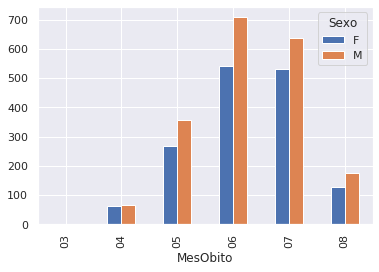

In [26]:
df.pivot_table('DataObito','MesObito','Sexo',aggfunc='count').plot.bar()

In [27]:
data = df['DataObito'].str.split(pat='-', expand=True).dropna()
data = data.astype(np.int)

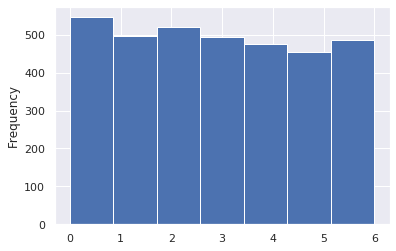

In [28]:
pd.to_datetime(df['DataObito'].dropna()).dt.dayofweek.plot.hist(bins=7)

In [35]:
df['DiaDaSemana'] = pd.to_datetime(df['DataNotificacao']).dt.dayofweek

In [54]:
pvt2 = df.pivot_table('DataObito',['MesObito','DiaDaSemana'],'Sexo',aggfunc='count')

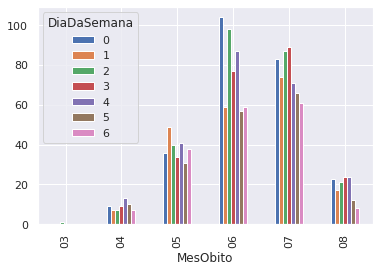

In [73]:
pvt2.unstack()['F'].plot.bar()

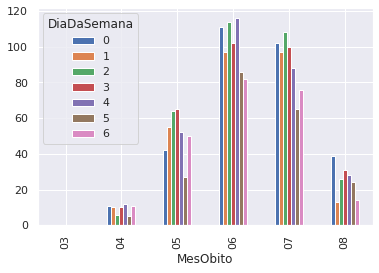

In [74]:
pvt2.unstack()['M'].plot.bar()

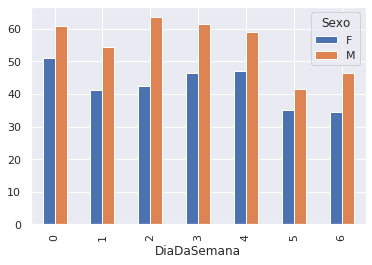

In [102]:
pvt2.unstack().mean(axis=0).unstack().T.plot.bar()

In [103]:
df

,DataNotificacao,DataCadastro,DataDiagnostico,DataColeta_RT_PCR,DataColetaTesteRapido,DataEncerramento,DataObito,Classificacao,Evolucao,CriterioConfirmacao,...,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,ViagemBrasil,ViagemInternacional,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua,MesObito,DiaDaSemana
0,2020-08-12,2020-08-11,2020-08-10,2020-08-11,NaN,NaN,NaN,Suspeito,Ignorado,Laboratorial,...,Não,Não,Não Informado,Ignorado,Ignorado,Não,Não,Não,NaN,2
1,2020-08-12,2020-08-09,2020-08-04,2020-08-09,2020-08-12,NaN,NaN,Suspeito,-,Laboratorial,...,Não,Não,Não Informado,Sim,Não,Não,Não,Não,NaN,2
2,2020-08-12,2020-08-12,2020-08-03,NaN,NaN,NaN,NaN,Confirmados,-,Laboratorial,...,Não,Não,Não Informado,Sim,Não Informado,Não,Não,Não,NaN,2
3,2020-08-12,2020-08-12,2020-08-08,NaN,NaN,NaN,NaN,Suspeito,-,-,...,Não,Não,Não,Não,Não,Não,Não,Não,NaN,2
4,2020-08-12,2020-08-12,2020-08-06,2020-08-12,NaN,NaN,NaN,Suspeito,Ignorado,Laboratorial,...,Não,Não,Não Informado,Não,Não Informado,Não,Não,Não,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284424,2020-02-27,2020-04-16,2020-02-09,2020-02-28,NaN,2020-04-16,NaN,Descartados,Ignorado,Laboratorial,...,Não,Não,Não Informado,Ignorado,Sim,Ignorado,Não Informado,Não Informado,NaN,3
284425,2020-02-27,2020-04-16,2020-02-15,2020-02-27,NaN,2020-04-16,NaN,Descartados,Ignorado,Laboratorial,...,Não,Não,Não,Não,Não,Não,Não Informado,Não Informado,NaN,3
284426,2020-02-27,2020-04-16,2020-02-15,2020-02-27,NaN,2020-04-16,NaN,Descartados,Ignorado,Laboratorial,...,Não,Não,Não Informado,Não,Não,Não,Não Informado,Não Informado,NaN,3
284427,2020-02-27,2020-04-15,2020-02-25,2020-02-26,NaN,2020-04-15,NaN,Descartados,Ignorado,Laboratorial,...,Não,Não,Não Informado,Não Informado,Sim,Não,Não Informado,Não Informado,NaN,3
